<a href="https://colab.research.google.com/github/atieh-a/ML.homework/blob/main/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, GridSearchCV
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingClassifier, BaggingRegressor

In [ ]:
airquality=pd.read_csv("C:/Users/arab/Downloads/airquality.csv")
airquality=airquality[['Ozone','Solar.R','Wind','Temp']]
airquality=airquality.dropna()
airquality.head()

,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
6,23.0,299.0,8.6,65


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(airquality[['Solar.R','Wind', 'Temp']], airquality['Ozone'], train_size=0.75,
                                                  random_state=1)

In [ ]:
# create regressor object
reg_rf = RandomForestRegressor(n_estimators = 100, random_state = 0,oob_score=True)
 
# fit the regressor with x and y data
reg_rf.fit(X_train,y_train) 

reg_rf_preds = reg_rf.predict(X_test)
print('MSPE: ', mean_squared_error(y_test, reg_rf_preds))
print(reg_rf.oob_score_)

MSPE:  265.6927999999999
0.7365145790534591


c:\users\arab\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
reg_rf.feature_importances_

array([0.08427794, 0.40847234, 0.50724972])

In [ ]:
airquality['TWcp']=airquality['Temp']*airquality['Wind']
airquality['TWrat']=airquality['Temp']/airquality['Wind']
airquality.head()

,Ozone,Solar.R,Wind,Temp,TWcp,TWrat
0,41.0,190.0,7.4,67,495.8,9.054054
1,36.0,118.0,8.0,72,576.0,9.000000
2,12.0,149.0,12.6,74,932.4,5.873016
3,18.0,313.0,11.5,62,713.0,5.391304
6,23.0,299.0,8.6,65,559.0,7.558140


In [ ]:
x_train, x_test, Y_train, Y_test = train_test_split(airquality[['Solar.R','Wind', 'Temp','TWcp','TWrat']], airquality['Ozone'], train_size=0.75,
                                                  random_state=1)

In [ ]:

reg_rf = RandomForestRegressor(n_estimators = 100, random_state = 0,oob_score=True)
 

reg_rf.fit(x_train,Y_train) 

reg_rf_preds = reg_rf.predict(x_test)
print('MSPE: ', mean_squared_error(Y_test, reg_rf_preds))
print(reg_rf.oob_score_)

MSPE:  337.82723928571426
0.710699085026504


c:\users\arab\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
reg_rf.feature_importances_

array([0.08019357, 0.04483777, 0.32687936, 0.05090013, 0.49718917])

In [ ]:
reg_rf.feature_names_in_

array(['Solar.R', 'Wind', 'Temp', 'TWcp', 'TWrat'], dtype=object)

<BarContainer object of 5 artists>

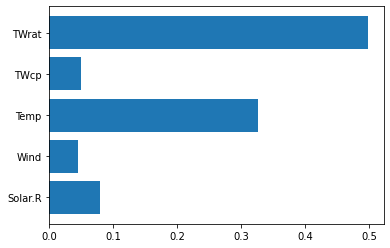

In [ ]:
plt.barh(reg_rf.feature_names_in_, reg_rf.feature_importances_)


In [ ]:
X=airquality[['Solar.R','Wind', 'Temp','TWcp','TWrat']]
y=airquality[['Ozone']]

In [ ]:
Parameter_Trials = {'max_features':[2,3,4],  # equivalent to R "mtry" parameter
                    'min_samples_leaf':[3,5,10]  # equivalent to R "nodesize" parameter
                   }

# Creating the RF model
RF_mod = RandomForestRegressor()

# Creating the Grid search space
grid_search = GridSearchCV(estimator=RF_mod, param_grid=Parameter_Trials, cv=10)

# Running Grid Search for different paramenters
grid_search.fit(X,y)

print(grid_search.cv_results_)

c:\users\arab\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\arab\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\arab\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\arab\appdata\local\programs\python\py

c:\users\arab\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\arab\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\arab\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\arab\appdata\local\programs\python\py

c:\users\arab\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\arab\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\arab\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\arab\appdata\local\programs\python\py

c:\users\arab\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\arab\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\arab\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\arab\appdata\local\programs\python\py

{'mean_fit_time': array([0.11770668, 0.11520658, 0.11430655, 0.11950681, 0.11620662,
       0.1177067 , 0.11980689, 0.11660664, 0.11500661]), 'std_fit_time': array([0.00422042, 0.00292599, 0.0039764 , 0.0070325 , 0.00462197,
       0.00601784, 0.00399526, 0.00272775, 0.00268337]), 'mean_score_time': array([0.01180072, 0.01180072, 0.0121007 , 0.01190066, 0.01210074,
       0.01150067, 0.01150057, 0.01130061, 0.01160066]), 'std_score_time': array([0.0008718 , 0.00039998, 0.00083073, 0.00070007, 0.00113579,
       0.00067083, 0.00050008, 0.00045833, 0.00048992]), 'param_max_features': masked_array(data=[2, 2, 2, 3, 3, 3, 4, 4, 4],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[3, 5, 10, 3, 5, 10, 3, 5, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
           

c:\users\arab\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
print('\n#### Best hyperparamters ####')
print(grid_search.best_params_)


#### Best hyperparamters ####
{'max_features': 4, 'min_samples_leaf': 5}


In [ ]:
print(grid_search.best_score_)

0.3275014920342216


In [ ]:
reg_rf = RandomForestRegressor(n_estimators = 100, min_samples_leaf=5, max_features=4, random_state = 0)
reg_rf.fit(x_train,Y_train) 

reg_rf_preds = reg_rf.predict(x_test)
print('MSPE: ', mean_squared_error(Y_test, reg_rf_preds))


MSPE:  323.9096570286423


In [ ]:
CV10 = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
airquality['CV'] = np.random.randint(low=0, high=10, size=(airquality.shape[0],))
airquality.head()

,Ozone,Solar.R,Wind,Temp,TWcp,TWrat,CV
0,41.0,190.0,7.4,67,495.8,9.054054,8
1,36.0,118.0,8.0,72,576.0,9.000000,0
2,12.0,149.0,12.6,74,932.4,5.873016,4
3,18.0,313.0,11.5,62,713.0,5.391304,9
6,23.0,299.0,8.6,65,559.0,7.558140,2


In [ ]:
RF_MSPE = []
RFTune_MSPE = []

for i in range(10):
    airquality_train = airquality.loc[airquality['CV'] != i]
    airquality_test = airquality.loc[airquality['CV'] == i]
    
    y_train = airquality_train['Ozone']
    X_train = airquality_train.drop(['Ozone','CV'],axis=1)
    y_test = airquality_test['Ozone']
    X_test = airquality_test.drop(['Ozone','CV'],axis=1)
 # RF
    reg_rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
    reg_rf.fit(X_train,y_train) 
    reg_rf_preds = reg_rf.predict(X_test)
    RF_MSPE.append(mean_squared_error(y_test, reg_rf_preds))
  
  # RFTune
    reg_rf1= RandomForestRegressor(n_estimators = 100, min_samples_leaf=5, max_features=4, random_state = 0)
    reg_rf1.fit(X_train,y_train) 
    reg_rf1_preds = reg_rf1.predict(X_test)
    RFTune_MSPE.append(mean_squared_error(y_test, reg_rf1_preds))

   

In [ ]:
print(RF_MSPE) 
print(RFTune_MSPE)

[426.24183076923094, 114.52380909090908, 786.6102999999999, 210.8242111111111, 275.9094647058823, 174.57818461538469, 85.1182285714286, 147.832575, 791.43065, 432.61350000000004]
[145.08353893319702, 154.45132061003318, 1246.1701658832685, 265.29830089955465, 400.4412704223204, 248.6523207615104, 173.16983813209026, 146.73508941522064, 560.2119802243349, 426.57892447631014]


<AxesSubplot:xlabel='Model', ylabel='RMSPE'>

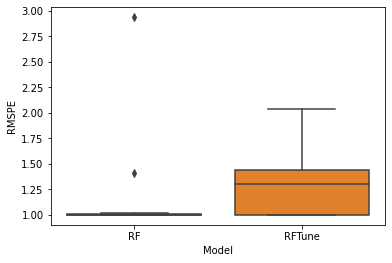

In [ ]:
    MSPEs=pd.DataFrame({'RF':RF_MSPE,  'RFTune':RFTune_MSPE})
    RMSPEs = MSPEs.div(MSPEs.min(axis=1), axis=0)
    RMSPEs["id"] = RMSPEs.index
    RMSPEs_long = pd.melt(RMSPEs, id_vars='id',
                     var_name = 'Model',
                     value_name = 'RMSPE',
                     value_vars=['RF','RFTune'])
sns.boxplot(y="RMSPE", x="Model", orient="v", data=RMSPEs_long)                 

   id Model        MSPE
0   0    RF  426.241831
1   1    RF  114.523809
2   2    RF  786.610300
3   3    RF  210.824211
4   4    RF  275.909465


<AxesSubplot:xlabel='Model', ylabel='MSPE'>

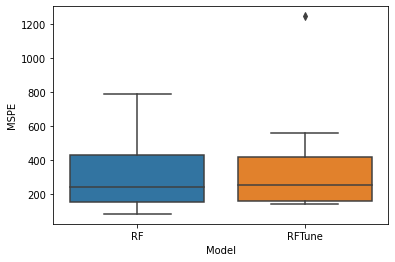

In [ ]:
MSPEs=pd.DataFrame({'RF':RF_MSPE,
                    'RFTune':RFTune_MSPE})
MSPEs["id"] = MSPEs.index
MSPEs_long = pd.melt(MSPEs, id_vars='id',
                     var_name = 'Model',
                     value_name = 'MSPE',
                     value_vars=['RF','RFTune'])
print(MSPEs_long.head())
sns.boxplot(y="MSPE", x="Model", orient="v", data=MSPEs_long)